In [1]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

import parameter_tuning as pt

%load_ext autoreload
%autoreload 2

In [2]:
sns.set_style("ticks", {'font.family':'sans-serif', 
               'font.sans-serif':['CMU Serif'],
               'size': 11})

In [3]:
colors_short = [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7972318339100346, 0.20092272202998845, 0.3008073817762399, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0)]

colors_long = [(1.0, 0.9803921568627451, 0.5529411764705883, 1.0),
 (0.9173394848135333, 0.9669357939254134, 0.6200692041522493, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.2265282583621684, 0.4938869665513264, 0.7224913494809688, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [4]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.1,
              'IF': -500,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'Iinit': 1.02,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

In [5]:
stimulus_range_s = [400, 450, 500, 550, 600, 650, 700]
stimulus_range_l = [700, 750, 800, 850, 900, 950, 1000]
stimulus_range = [400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

In [6]:
stimulus_lst_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_lst_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

# CV

In [84]:
sigma_lst = [0,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.05,0.06,0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25]

In [85]:
import matplotlib as mpl
jet = cm = plt.get_cmap('Blues') 
cNorm  = mpl.colors.Normalize(vmin=-5, vmax=len(sigma_lst)-1)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)

colors = []
for i in range(len(sigma_lst)):
    colors.append(scalarMap.to_rgba(i))

In [86]:
K = 8.5

stds_s_mean = []
for sigma in sigma_lst:
    stds_si = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=100, th=0.7, sigma = sigma)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_short, K)
        beh_result = exp_result.create_behavioral_data()
        stds_si.append(beh_result.production_stds)
    stds_s_mean.append(np.mean(stds_si, axis=0))

In [87]:
K = 6
stds_l_mean = []

for sigma in sigma_lst:
    stds_li = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=100, th=0.7, sigma = sigma)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_long, K)
        beh_result = exp_result.create_behavioral_data()
        stds_li.append(beh_result.production_stds)
    stds_l_mean.append(np.mean(stds_li, axis=0))

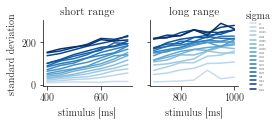

In [107]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors)
ax[1].set_prop_cycle(color=colors)

for lst, sigma in zip(stds_s_mean, sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range', fontsize=11)
ax[0].set_ylabel('standard deviation')
ax[0].set_xlabel('stimulus [ms]')
ax[1].set_xlabel('stimulus [ms]')

for lst, sigma in zip(stds_l_mean, sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range',  fontsize=11)

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

ax[1].legend(bbox_to_anchor=(1.05, 1.2), title='sigma', frameon=False,  prop={'size': 3.4})
plt.savefig('../report/figures/interI_dyn/std.svg', dpi=500, bbox_inches='tight')

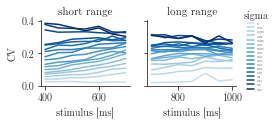

In [108]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors)
ax[1].set_prop_cycle(color=colors)

for lst, sigma in zip(np.array(stds_s_mean)/np.array(stimulus_range_s), sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range', fontsize=11)
ax[0].set_ylabel('CV')
ax[0].set_xlabel('stimulus [ms]')
ax[1].set_xlabel('stimulus [ms]')

for lst, sigma in zip(np.array(stds_l_mean)/np.array(stimulus_range_l), sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range', fontsize=11)

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

ax[1].legend(bbox_to_anchor=(1.05, 1.2), title='sigma', frameon=False,  prop={'size': 3.4})
plt.savefig('../report/figures/interI_dyn/CV.svg', dpi=500, bbox_inches='tight')

In [21]:
np.mean(np.array(stds_s_mean)/np.array(stimulus_range_s), axis=1)

array([0.0221595 , 0.05413294, 0.07651025, 0.0978966 , 0.1190951 ,
       0.14214152, 0.15060981, 0.1696788 , 0.2007554 , 0.22077025,
       0.23837044, 0.25555949, 0.26796454, 0.29003393, 0.32913087,
       0.34300797, 0.35396547])

In [22]:
np.mean(np.array(stds_l_mean)/np.array(stimulus_range_l), axis=1)

array([0.03210604, 0.09439817, 0.12511334, 0.14479724, 0.16545488,
       0.18226704, 0.19622793, 0.20620773, 0.21729895, 0.23649206,
       0.23793532, 0.2458915 , 0.2505616 , 0.260644  , 0.28594219,
       0.2919264 , 0.28925909])

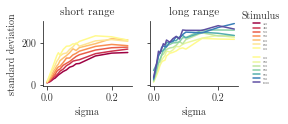

In [109]:
fig, ax = plt.subplots(1,2, sharey=True, sharex=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors_short)
ax[1].set_prop_cycle(color=colors_long)

for lst, stimulus in zip(np.array(stds_s_mean).T, stimulus_range_s):
    ax[0].plot(sigma_lst, lst, label=str(stimulus))
ax[0].set_title('short range', fontsize=11)
ax[0].set_ylabel('standard deviation')
ax[0].set_xlabel('sigma')
ax[1].set_xlabel('sigma')

for lst, stimulus in zip(np.array(stds_l_mean).T, stimulus_range_l):
    ax[1].plot(sigma_lst, lst, label=str(stimulus))
ax[1].set_title('long range', fontsize=11)

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

ax[1].legend(bbox_to_anchor=(1.384, 0.5), frameon=False,  prop={'size': 3.4})
ax[0].legend(bbox_to_anchor=(2.7, 1.2), title='Stimulus',frameon=False,  prop={'size': 3.4})
plt.savefig('../report/figures/interI_dyn/std_stim.svg', dpi=500, bbox_inches='tight')

# Parameter Space (K 1-18, sigma = 0.02)

In [7]:
K_lst = np.arange(1, 18, 0.5)
tau = np.arange(60, 190, 10)

print(len(K_lst), len(tau))

34 13


In [8]:
path = '../results/intermediateI/'
short_ktau065, long_ktau065 = pt.load_data(path+'SHORT_K1-18TAU_th065_del700_sig02_fixed_seed-20220728-113920-output.pickle',
                                      path+'LONG_K1-18TAU_th065_del700_sig02_fixed_seed-20220728-111650-output.pickle')
short_ktau07, long_ktau07 = pt.load_data(path+'SHORT_K1-18TAU_th07_del700_sig02_fixed_seed-20220728-120026-output.pickle', 
                                      path+'LONG_K1-18TAU_th07_del700_sig02_fixed_seed-20220728-121929-output.pickle')
short_ktau075, long_ktau075 = pt.load_data(path+'SHORT_K1-18TAU_th075_del700_sig02_fixed_seed-20220728-134030-output.pickle', 
                                      path+'LONG_K1-18TAU_th075_del700_sig02_fixed_seed-20220728-124551-output.pickle')

# INDIFFERENCE POINT

threshold 0.75
-18132.02694877189 9070.892965574652
threshold 0.7
-6787.037521142813 11230.554170025694
threshold 0.65
-50162.39926356445 32940.64559699417


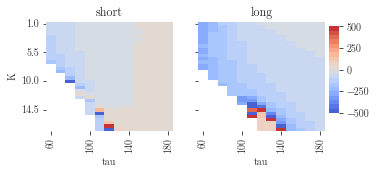

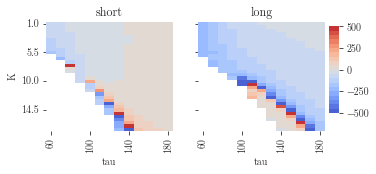

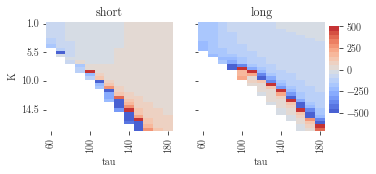

In [58]:
print('threshold', 0.75)
pt.plot_ind_point(short_ktau075, long_ktau075, K_lst, tau)
print('threshold', 0.7)
pt.plot_ind_point(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.65)
pt.plot_ind_point(short_ktau065, long_ktau065, K_lst, tau)

# SLOPE

threshold 0.75
-0.23844927974144484 1.20963144485069
threshold 0.7
-0.24175631669511818 1.3650564680526647
threshold 0.65
-0.2791215657637044 1.4505708361026972


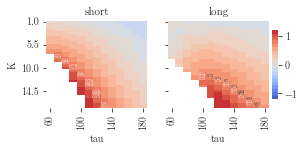

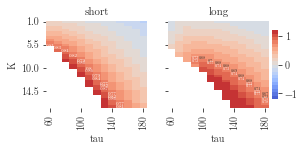

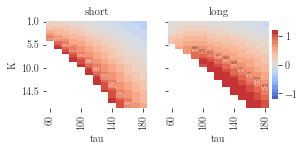

In [119]:
print('threshold', 0.75)
pt.plot_slope_behavior(short_ktau075, long_ktau075, K_lst, tau)
plt.savefig('../report/figures/interI_params/slope75.svg',  bbox_inches='tight')
print('threshold', 0.7)
pt.plot_slope_behavior(short_ktau07, long_ktau07, K_lst, tau)
plt.savefig('../report/figures/interI_params/slope7.svg',  bbox_inches='tight')
print('threshold', 0.65)
pt.plot_slope_behavior(short_ktau065, long_ktau065, K_lst, tau)
plt.savefig('../report/figures/interI_params/slope65.svg',  bbox_inches='tight')

# MSE = BIAS2 + VAR

threshold 0.75
3748.532114119628 120043.754850718
130 16.0
[(60, 5.5), (70, 5.0), (80, 6.5), (90, 8.0), (100, 10.5), (110, 12.0), (120, 14.0), (130, 16.0), (140, 17.5), (150, 17.5), (160, 17.5), (170, 17.5), (180, 17.5)]
180 17.5
[(60, 1.5), (70, 1.5), (80, 1.0), (90, 2.5), (100, 5.0), (110, 5.5), (120, 6.0), (130, 10.5), (140, 13.5), (150, 14.0), (160, 14.5), (170, 17.5), (180, 17.5)]
short
['7.5,70' '8.0,70' '8.5,80' '9.0,80' '9.5,90' '10.0,90' '11.0,100'
 '11.5,100' '12.5,110' '13.0,110' '13.5,110' '14.5,120' '15.0,120'
 '15.5,120' '17.0,130' '17.5,130']
long
['11.0,100' '11.5,100' '11.5,110' '12.0,100' '12.0,120' '12.5,120'
 '12.5,130' '13.0,130' '13.5,130' '13.5,140' '14.0,140' '14.5,140'
 '14.5,150' '15.0,150' '15.5,150' '16.0,160' '16.5,160' '17.0,160'
 '17.0,170' '17.5,170']


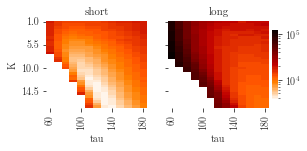

In [125]:
print('threshold', 0.75)
pt.plot_mse(short_ktau075, long_ktau075, K_lst, tau)
print(pt.get_opt_K(short_ktau075, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, mse=True))
pt.parameter_behavioural_plausible(short_ktau075, long_ktau075, K_lst, tau)
plt.savefig('../report/figures/interI_params/mse75.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.7355977664088119
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.568598882774988


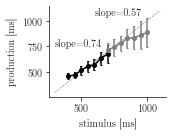

In [11]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=130, sigma=0.02, th=0.75)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 16
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 10.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/interI_params/mse75_beh120.svg', dpi=500, bbox_inches='tight')

threshold 0.7
3351.702340621643 103081.51016117324
120 11.0
[(60, 3.5), (70, 4.5), (80, 5.5), (90, 7.0), (100, 8.5), (110, 9.5), (120, 11.0), (130, 13.0), (140, 14.0), (150, 16.5), (160, 17.5), (170, 17.5), (180, 17.5)]
180 16.5
[(60, 1.0), (70, 1.0), (80, 2.5), (90, 3.5), (100, 4.0), (110, 4.5), (120, 7.0), (130, 10.0), (140, 10.5), (150, 12.0), (160, 13.5), (170, 15.5), (180, 16.5)]
short
['5.5,60' '6.0,70' '6.5,80' '7.5,90' '8.5,100' '9.0,100' '10.0,110'
 '10.5,110' '11.5,120' '12.0,120' '13.0,130' '13.5,130' '14.0,130'
 '15.0,140' '15.5,140' '16.0,140' '17.0,150' '17.5,150']
long
['8.0,90' '8.0,100' '8.5,90' '8.5,110' '9.0,110' '9.0,120' '9.5,120'
 '9.5,130' '10.0,130' '10.5,140' '11.0,140' '11.5,150' '12.0,150'
 '12.5,160' '13.0,160' '13.5,160' '14.0,170' '14.5,170' '15.0,170'
 '15.0,180' '15.5,180' '16.0,180' '16.5,180']


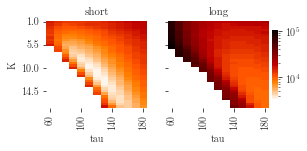

In [127]:
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau)
plt.savefig('../report/figures/interI_params/mse7.svg', dpi=500, bbox_inches='tight')
print(pt.get_opt_K(short_ktau07, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau07, K_lst, tau, mse=True))
pt.parameter_behavioural_plausible(short_ktau07, long_ktau07, K_lst, tau)

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.7474338163986581
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.5028920853674232


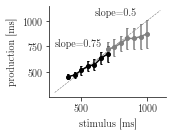

In [12]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=120, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 11
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 7
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/interI_params/mse7_beh120.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.7071948060153771
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.6924981328927253


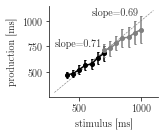

In [23]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=140, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.4,2))

K = 14
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 10.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/interI_params/mse7_beh140.svg', dpi=500, bbox_inches='tight')

threshold 0.65
3170.3196620991193 82909.48408839782
110 8.0
[(60, 3.0), (70, 4.0), (80, 5.0), (90, 6.0), (100, 7.0), (110, 8.0), (120, 9.0), (130, 10.5), (140, 12.0), (150, 14.0), (160, 15.5), (170, 17.0), (180, 17.5)]
180 15.0
[(60, 1.0), (70, 1.5), (80, 2.0), (90, 2.5), (100, 4.0), (110, 5.5), (120, 7.0), (130, 7.5), (140, 10.0), (150, 10.5), (160, 12.5), (170, 13.0), (180, 15.0)]
short
['4.5,60' '4.5,70' '5.5,80' '6.5,90' '7.5,100' '8.5,110' '9.0,110'
 '10.0,120' '10.5,120' '11.5,130' '12.0,130' '13.0,140' '13.5,140'
 '15.0,150' '15.5,150' '17.0,160' '17.5,160']
long
['6.0,90' '6.5,80' '6.5,90' '6.5,100' '7.0,110' '7.5,120' '8.0,120'
 '8.0,130' '8.5,130' '9.0,140' '9.5,140' '10.0,150' '10.5,150' '11.0,160'
 '11.5,160' '12.0,170' '12.5,170' '13.0,170' '13.5,180' '14.0,180']


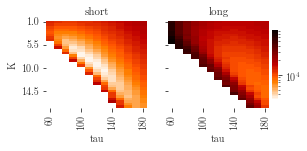

In [129]:
print('threshold', 0.65)
pt.plot_mse(short_ktau065, long_ktau065, K_lst, tau)
plt.savefig('../report/figures/interI_params/mse65.svg', dpi=500, bbox_inches='tight')
print(pt.get_opt_K(short_ktau065, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau065, K_lst, tau, mse=True))
pt.parameter_behavioural_plausible(short_ktau065, long_ktau065, K_lst, tau)

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.7055803154042933
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.6210318232623676


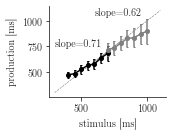

In [14]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=130, sigma=0.02, th=0.65)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 10.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 7.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/interI_params/mse65_beh130.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.7138167476412586
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.0)]
0.7421870425341379


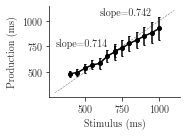

In [65]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=150, sigma=0.02, th=0.65)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.7,2))

K = 14
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

K = 10.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
#plt.savefig('../report/figures/interI/mse65_beh.png', dpi=500, bbox_inches='tight')

# BIAS2

threshold 0.75
297.584162608647 83184.43687542142
100 12.0
[(60, 7.0), (70, 8.5), (80, 10.0), (90, 12.0), (100, 12.0), (110, 14.0), (120, 16.0), (130, 17.5), (140, 17.5), (150, 17.5), (160, 17.5), (170, 17.5), (180, 17.5)]
120 15.5
[(60, 7.5), (70, 9.0), (80, 10.0), (90, 11.5), (100, 13.0), (110, 14.5), (120, 15.5), (130, 17.5), (140, 17.5), (150, 17.5), (160, 17.5), (170, 17.5), (180, 17.5)]


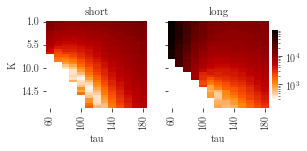

In [131]:
print('threshold', 0.75)
pt.plot_mse(short_ktau075, long_ktau075, K_lst, tau, 'bias2')
print(pt.get_opt_K(short_ktau075, K_lst, tau, bias2=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, bias2=True))
plt.savefig('../report/figures/interI_params/biassquar75.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.8894515212567036
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.06), (1000, 0.03)]
1.111592154277968


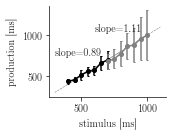

In [15]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=120, sigma=0.02, th=0.75)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 16
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 15.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/interI_params/biassquar75_beh120.svg', dpi=500, bbox_inches='tight')

threshold 0.7
255.64043836046275 66646.845690239
100 9.5
[(60, 5.5), (70, 6.5), (80, 7.5), (90, 8.0), (100, 9.5), (110, 11.0), (120, 12.5), (130, 14.5), (140, 16.0), (150, 17.5), (160, 17.5), (170, 17.5), (180, 17.5)]
110 11.0
[(60, 6.0), (70, 7.0), (80, 8.0), (90, 9.0), (100, 10.0), (110, 11.0), (120, 12.0), (130, 13.0), (140, 14.5), (150, 15.5), (160, 17.0), (170, 17.5), (180, 17.5)]


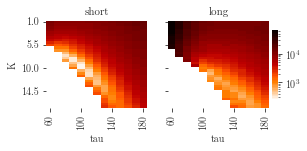

In [133]:
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau, 'bias2')
print(pt.get_opt_K(short_ktau07, K_lst, tau, bias2=True))
print(pt.get_opt_K(long_ktau07, K_lst, tau, bias2=True))
plt.savefig('../report/figures/interI_params/biassquar7.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.9120558097891924
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.06), (1000, 0.03)]
1.0746918579954003


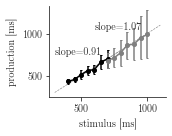

In [16]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=110, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 11
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 11
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/interI_params/biassquar7_beh110.svg', dpi=500, bbox_inches='tight')

threshold 0.65
237.75198828986586 48729.73513975592
90 7.0
[(60, 4.5), (70, 5.5), (80, 6.0), (90, 7.0), (100, 8.0), (110, 9.5), (120, 10.5), (130, 12.0), (140, 13.5), (150, 14.5), (160, 16.5), (170, 17.5), (180, 17.5)]
130 11.0
[(60, 5.0), (70, 5.5), (80, 6.5), (90, 7.5), (100, 8.5), (110, 9.0), (120, 10.0), (130, 11.0), (140, 12.0), (150, 13.5), (160, 15.0), (170, 16.0), (180, 17.5)]


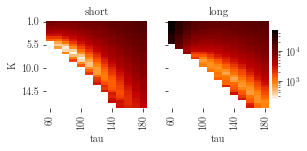

In [135]:
print('threshold', 0.65)
pt.plot_mse(short_ktau065, long_ktau065, K_lst, tau, 'bias2')
print(pt.get_opt_K(short_ktau065, K_lst, tau, bias2=True))
print(pt.get_opt_K(long_ktau065, K_lst, tau, bias2=True))
plt.savefig('../report/figures/interI_params/biassquar65.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.9213914432136596
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.03), (1000, 0.01)]
1.0889593581263295


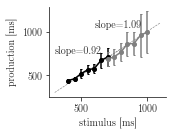

In [17]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=110, sigma=0.02, th=0.65)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 9.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

np.random.seed(0)
K = 9
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='stimulus [ms]', ylabel='production [ms]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
plt.savefig('../report/figures/interI_params/biassquar65_beh110.svg', dpi=500, bbox_inches='tight')

# VAR

threshold 0.75
1981.2865999655023 58304.68425909332
160 1.5
[(60, 1.0), (70, 1.0), (80, 1.5), (90, 1.5), (100, 1.0), (110, 1.0), (120, 1.0), (130, 1.5), (140, 8.0), (150, 8.5), (160, 1.5), (170, 1.5), (180, 10.5)]
180 5.5
[(60, 1.0), (70, 1.5), (80, 1.0), (90, 2.0), (100, 2.5), (110, 3.0), (120, 3.0), (130, 3.5), (140, 3.5), (150, 4.0), (160, 4.0), (170, 4.0), (180, 5.5)]


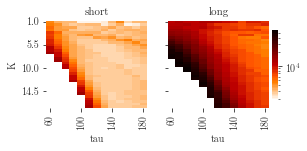

In [137]:
print('threshold', 0.75)
pt.plot_mse(short_ktau075, long_ktau075, K_lst, tau, 'var')
print(pt.get_opt_K(short_ktau075, K_lst, tau, var=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, var=True))
plt.savefig('../report/figures/interI_params/var75.svg', dpi=500, bbox_inches='tight')

threshold 0.7
2280.979503710504 57459.603166534274
130 4.0
[(60, 1.0), (70, 2.0), (80, 2.0), (90, 2.0), (100, 2.5), (110, 3.5), (120, 4.0), (130, 4.0), (140, 4.5), (150, 5.5), (160, 6.5), (170, 6.0), (180, 8.0)]
180 3.5
[(60, 1.5), (70, 1.5), (80, 1.0), (90, 1.0), (100, 2.0), (110, 1.5), (120, 1.5), (130, 2.0), (140, 2.5), (150, 2.5), (160, 2.5), (170, 3.0), (180, 3.5)]


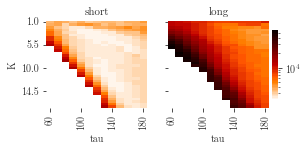

In [138]:
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau, 'var')
print(pt.get_opt_K(short_ktau07, K_lst, tau, var=True))
print(pt.get_opt_K(long_ktau07, K_lst, tau, var=True))
plt.savefig('../report/figures/interI_params/var7.svg', dpi=500, bbox_inches='tight')

threshold 0.65
1491.6942614870284 53820.174956056384
120 1.0
[(60, 1.0), (70, 1.0), (80, 1.0), (90, 1.0), (100, 1.0), (110, 1.0), (120, 1.0), (130, 1.0), (140, 1.0), (150, 1.0), (160, 1.5), (170, 1.5), (180, 2.0)]
180 1.0
[(60, 1.0), (70, 1.0), (80, 1.0), (90, 1.0), (100, 1.0), (110, 1.5), (120, 1.5), (130, 1.0), (140, 1.0), (150, 1.0), (160, 1.0), (170, 1.0), (180, 1.0)]


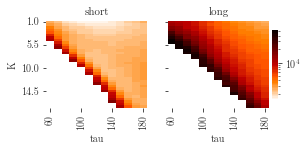

In [139]:
print('threshold', 0.65)
pt.plot_mse(short_ktau065, long_ktau065, K_lst, tau, 'var')
print(pt.get_opt_K(short_ktau065, K_lst, tau, var=True))
print(pt.get_opt_K(long_ktau065, K_lst, tau, var=True))
plt.savefig('../report/figures/interI_params/var65.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.9213914432136596
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.0), (900, 0.0), (950, 0.0), (1000, 0.03)]
1.0533961833054692


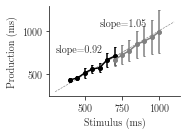

In [96]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=110, sigma=0.02, th=0.65)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.7,2))

K = 9.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

K = 9
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
#plt.savefig('../report/figures/interI/mse65_beh.png', dpi=500, bbox_inches='tight')

# BIAS

threshold 0.75
-272.0137605098891 21.4458324963563
150 2.5
[(60, 7.0), (70, 8.5), (80, 10.0), (90, 11.5), (100, 12.5), (110, 14.0), (120, 14.5), (130, 14.5), (140, 13.5), (150, 2.5), (160, 1.5), (170, 4.0), (180, 8.5)]
130 17.0
[(60, 7.0), (70, 9.0), (80, 10.0), (90, 11.0), (100, 13.0), (110, 14.5), (120, 17.5), (130, 17.0), (140, 17.5), (150, 17.5), (160, 17.5), (170, 1.0), (180, 1.0)]


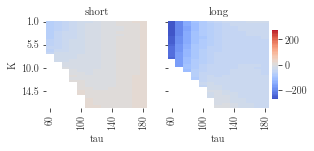

In [140]:
print('threshold', 0.75)
pt.plot_mse(short_ktau075, long_ktau075, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau075, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, bias=True))
plt.savefig('../report/figures/interI_params/bias75.svg', dpi=500, bbox_inches='tight')

threshold 0.7
-236.89817567270327 39.126163814863176
150 2.5
[(60, 7.0), (70, 8.5), (80, 10.0), (90, 11.5), (100, 12.5), (110, 14.0), (120, 14.5), (130, 14.5), (140, 13.5), (150, 2.5), (160, 1.5), (170, 4.0), (180, 8.5)]
130 17.0
[(60, 7.0), (70, 9.0), (80, 10.0), (90, 11.0), (100, 13.0), (110, 14.5), (120, 17.5), (130, 17.0), (140, 17.5), (150, 17.5), (160, 17.5), (170, 1.0), (180, 1.0)]


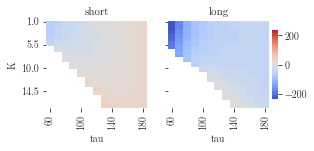

In [141]:
print('threshold', 0.7)
pt.plot_mse(short_ktau07, long_ktau07, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau075, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, bias=True))
plt.savefig('../report/figures/interI_params/bias7.svg', dpi=500, bbox_inches='tight')

timeouts: [(400, 0.0), (450, 0.0), (500, 0.0), (550, 0.0), (600, 0.0), (650, 0.0), (700, 0.0)]
0.8152503663242282
timeouts: [(700, 0.0), (750, 0.0), (800, 0.0), (850, 0.03), (900, 0.01), (950, 0.01), (1000, 0.04)]
0.7305908674698468


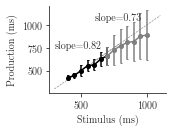

In [142]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=90, sigma=0.02, th=0.7)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.5,2))

K = 7.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

K = 8.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
#plt.savefig('../report/figures/interI/mse65_beh.png', dpi=500, bbox_inches='tight')

threshold 0.65
-196.8383366964931 49.977885468568694
150 2.5
[(60, 7.0), (70, 8.5), (80, 10.0), (90, 11.5), (100, 12.5), (110, 14.0), (120, 14.5), (130, 14.5), (140, 13.5), (150, 2.5), (160, 1.5), (170, 4.0), (180, 8.5)]
130 17.0
[(60, 7.0), (70, 9.0), (80, 10.0), (90, 11.0), (100, 13.0), (110, 14.5), (120, 17.5), (130, 17.0), (140, 17.5), (150, 17.5), (160, 17.5), (170, 1.0), (180, 1.0)]


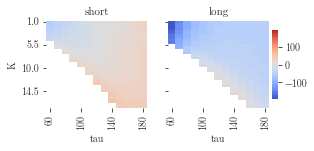

In [143]:
print('threshold', 0.65)
pt.plot_mse(short_ktau065, long_ktau065, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau075, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau075, K_lst, tau, bias=True))
plt.savefig('../report/figures/interI_params/bias65.svg', dpi=500, bbox_inches='tight')

threshold 0.75
247344.16632443533 636075.6129032258
threshold 0.7
245641.24640657083 630249.2244488978
threshold 0.65
244418.3353909465 624048.832


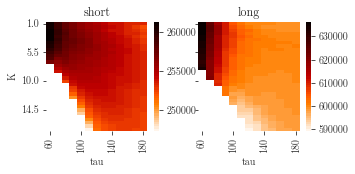

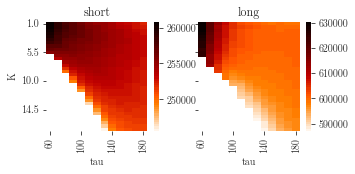

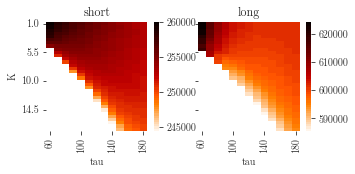

In [128]:
print('threshold', 0.75)
pt.plot_mse_total(short_ktau075, long_ktau075, K_lst, tau)
print('threshold', 0.7)
pt.plot_mse_total(short_ktau07, long_ktau07, K_lst, tau)
print('threshold', 0.65)
pt.plot_mse_total(short_ktau065, long_ktau065, K_lst, tau)

# Initialization

In [19]:
seed = np.arange(0, 21, 1)
K_lst = np.arange(1, 18, 0.5)

In [20]:
path = '../results/intermediateI/'
short_ktau07_seed, long_ktau07_seed = pt.load_data(
    path+'SHORT_K1-18_TAU140_th07_del700_sig02_seed-20220731-133728-output.pickle',
    path+'LONG_K1-18_TAU140_th07_del700_sig02_seed-20220731-122530-output.pickle')

-0.5667587116305386 1.4699129256955348


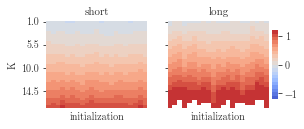

In [146]:
pt.plot_slope(short_ktau07_seed, long_ktau07_seed, K_lst, seed)
plt.savefig('../report/figures/interI_params/slope7_seed.svg', dpi=500, bbox_inches='tight')

17 15.0
[(0, 14.0), (1, 14.0), (2, 14.0), (3, 14.0), (4, 15.0), (5, 13.5), (6, 14.0), (7, 15.0), (8, 14.5), (9, 14.0), (10, 14.5), (11, 15.5), (12, 14.5), (13, 14.5), (14, 15.0), (15, 14.0), (16, 14.5), (17, 15.0), (18, 15.0), (19, 14.5), (20, 14.5)]
10 10.0
[(0, 10.5), (1, 10.5), (2, 9.0), (3, 11.5), (4, 10.5), (5, 9.5), (6, 9.0), (7, 10.5), (8, 10.0), (9, 10.0), (10, 10.0), (11, 10.5), (12, 9.0), (13, 10.0), (14, 10.0), (15, 10.5), (16, 10.5), (17, 9.0), (18, 10.0), (19, 8.0), (20, 9.5)]


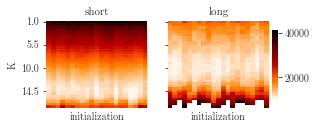

In [22]:
pt.plot_mse_sep(short_ktau07_seed, long_ktau07_seed, K_lst, seed)
print(pt.get_opt_K(short_ktau07_seed, K_lst, seed, mse=True))
print(pt.get_opt_K(long_ktau07_seed, K_lst, seed, mse=True))
plt.savefig('../report/figures/interI_params/mse7_seed.svg', dpi=500, bbox_inches='tight')

In [148]:
np.mean(list(zip(*pt.get_opt_K(short_ktau07_seed, K_lst, seed, mse=True)))[1]), np.std(list(zip(*pt.get_opt_K(short_ktau07_seed, K_lst, seed,mse=True)))[1])

17 15.0
17 15.0


(14.452380952380953, 0.48562090605645575)

ERROR! Session/line number was not unique in database. History logging moved to new session 708


In [149]:
np.mean(list(zip(*pt.get_opt_K(long_ktau07_seed, K_lst, seed, mse=True)))[1]), np.std(list(zip(*pt.get_opt_K(long_ktau07_seed, K_lst, seed, mse=True)))[1])

10 10.0
10 10.0


(9.904761904761905, 0.7656159614673108)

ERROR! Session/line number was not unique in database. History logging moved to new session 709


-55.42603182688621 36.649999437179375
16 9.0
[(0, 4.0), (1, 7.5), (2, 5.5), (3, 3.5), (4, 4.5), (5, 3.0), (6, 3.0), (7, 2.5), (8, 1.5), (9, 4.5), (10, 8.5), (11, 6.0), (12, 3.0), (13, 2.5), (14, 6.5), (15, 5.0), (16, 9.0), (17, 5.0), (18, 10.0), (19, 7.5), (20, 3.5)]
10 16.0
[(0, 17.0), (1, 16.0), (2, 15.5), (3, 16.5), (4, 16.5), (5, 16.0), (6, 15.5), (7, 15.0), (8, 16.5), (9, 17.5), (10, 16.0), (11, 17.0), (12, 16.0), (13, 17.5), (14, 15.5), (15, 16.5), (16, 17.0), (17, 17.0), (18, 15.5), (19, 16.0), (20, 17.5)]


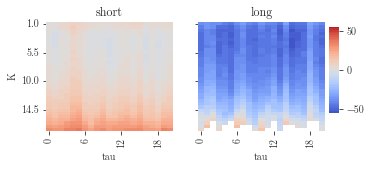

In [24]:
pt.plot_mse(short_ktau07_seed, long_ktau07_seed, K_lst, seed, 'bias')
print(pt.get_opt_K(short_ktau07_seed, K_lst, seed, bias=True))
print(pt.get_opt_K(long_ktau07_seed, K_lst, seed, bias=True))
#plt.savefig('../report/figures/interI/bias7_seed.png', dpi=500, bbox_inches='tight')